In [1]:
from utils import CNC
from types import SimpleNamespace

In [2]:
args = SimpleNamespace(
    file_path = "./data/data.csv",
    model = "XGB",
    sampler = "SMOTE",
    future_steps = 1,
    window_size = 5,
    test_size = 200,
    seed = 0,
)
cnc = CNC(args)

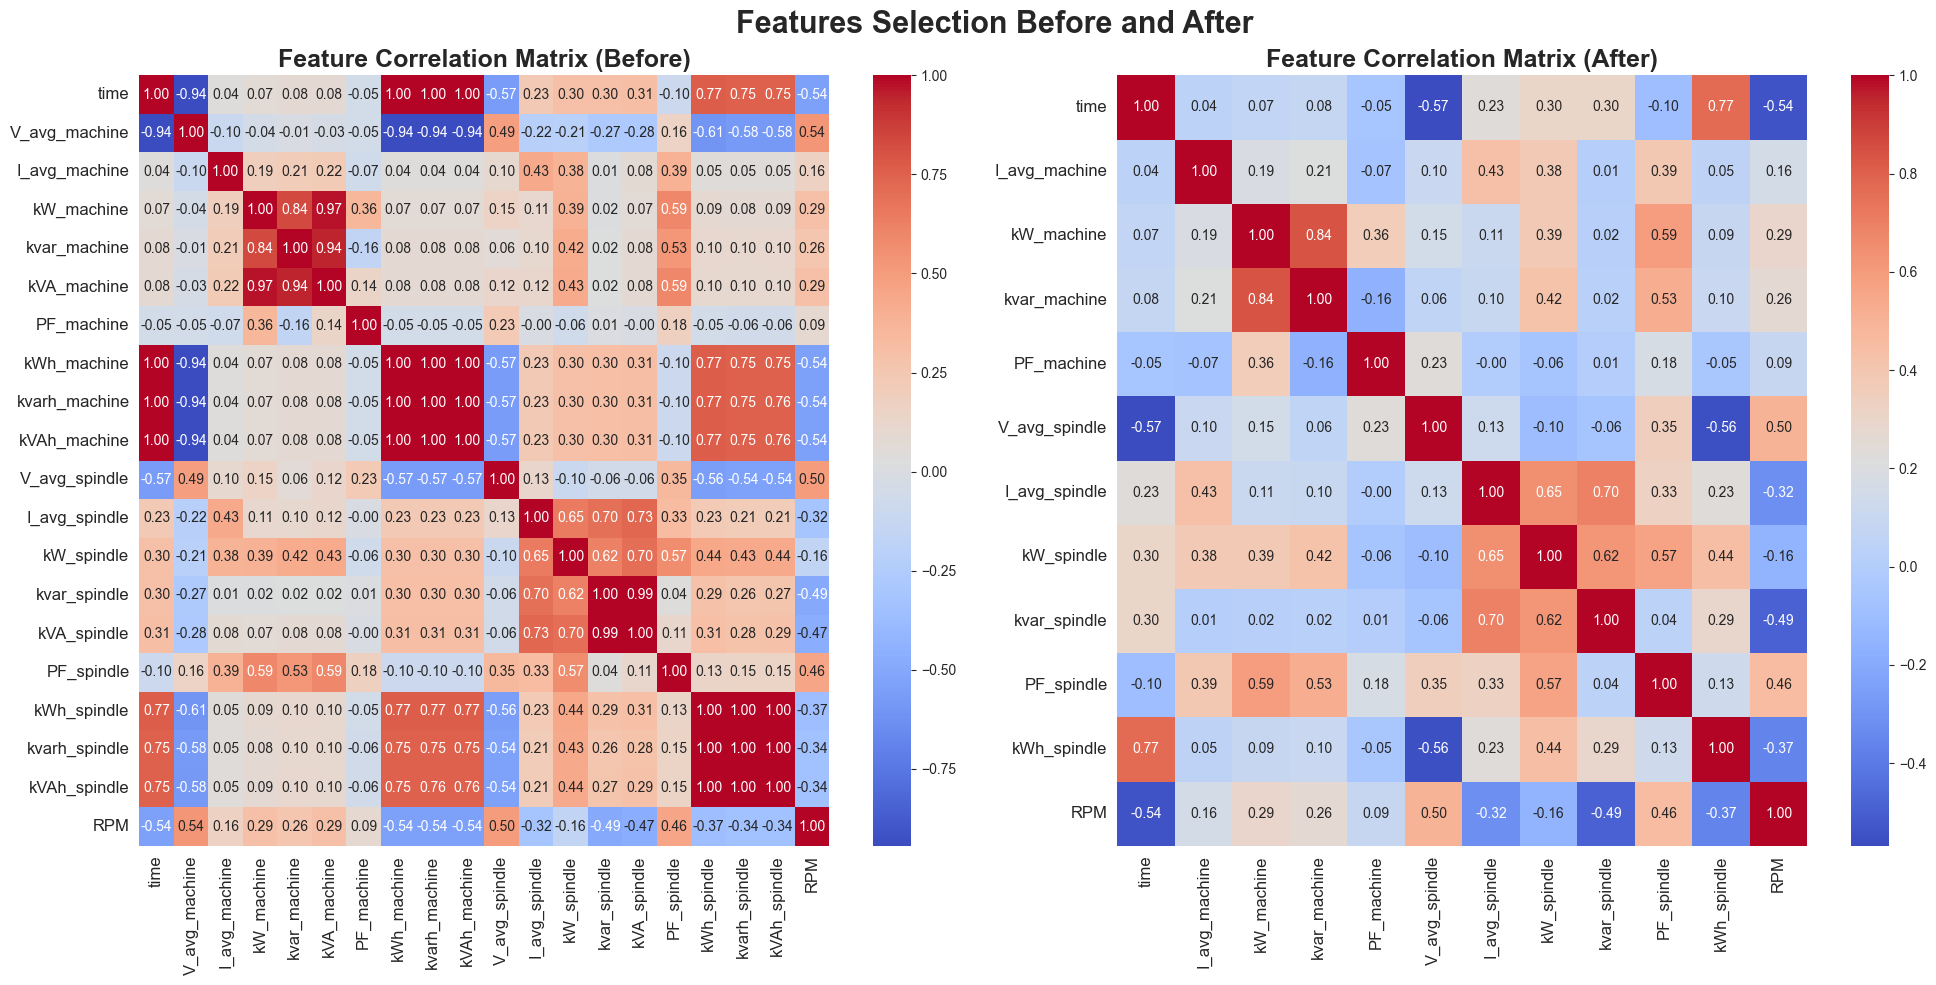

Data preprocessing: 100%|██████████| 1209/1209 [00:00<00:00, 12999.78it/s]


In [3]:
cnc.pre_process()

Training models:   0%|          | 0/1 [00:00<?, ?it/s]

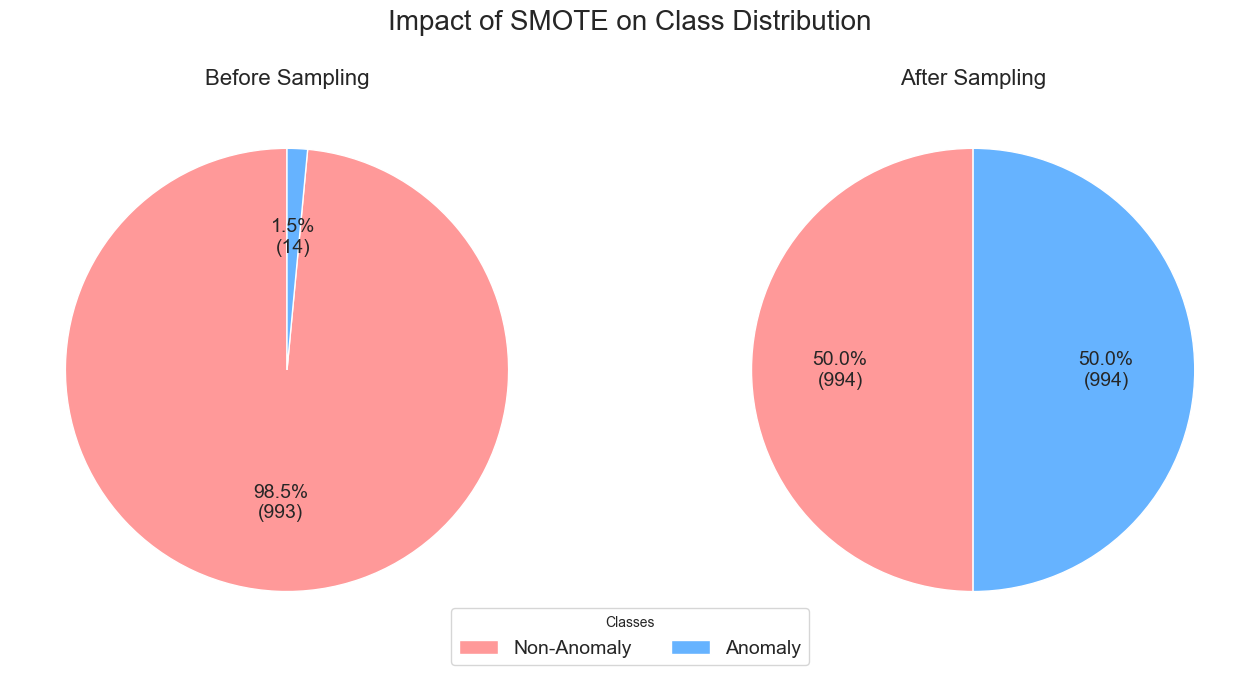

Training models: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


In [4]:
cnc.train()

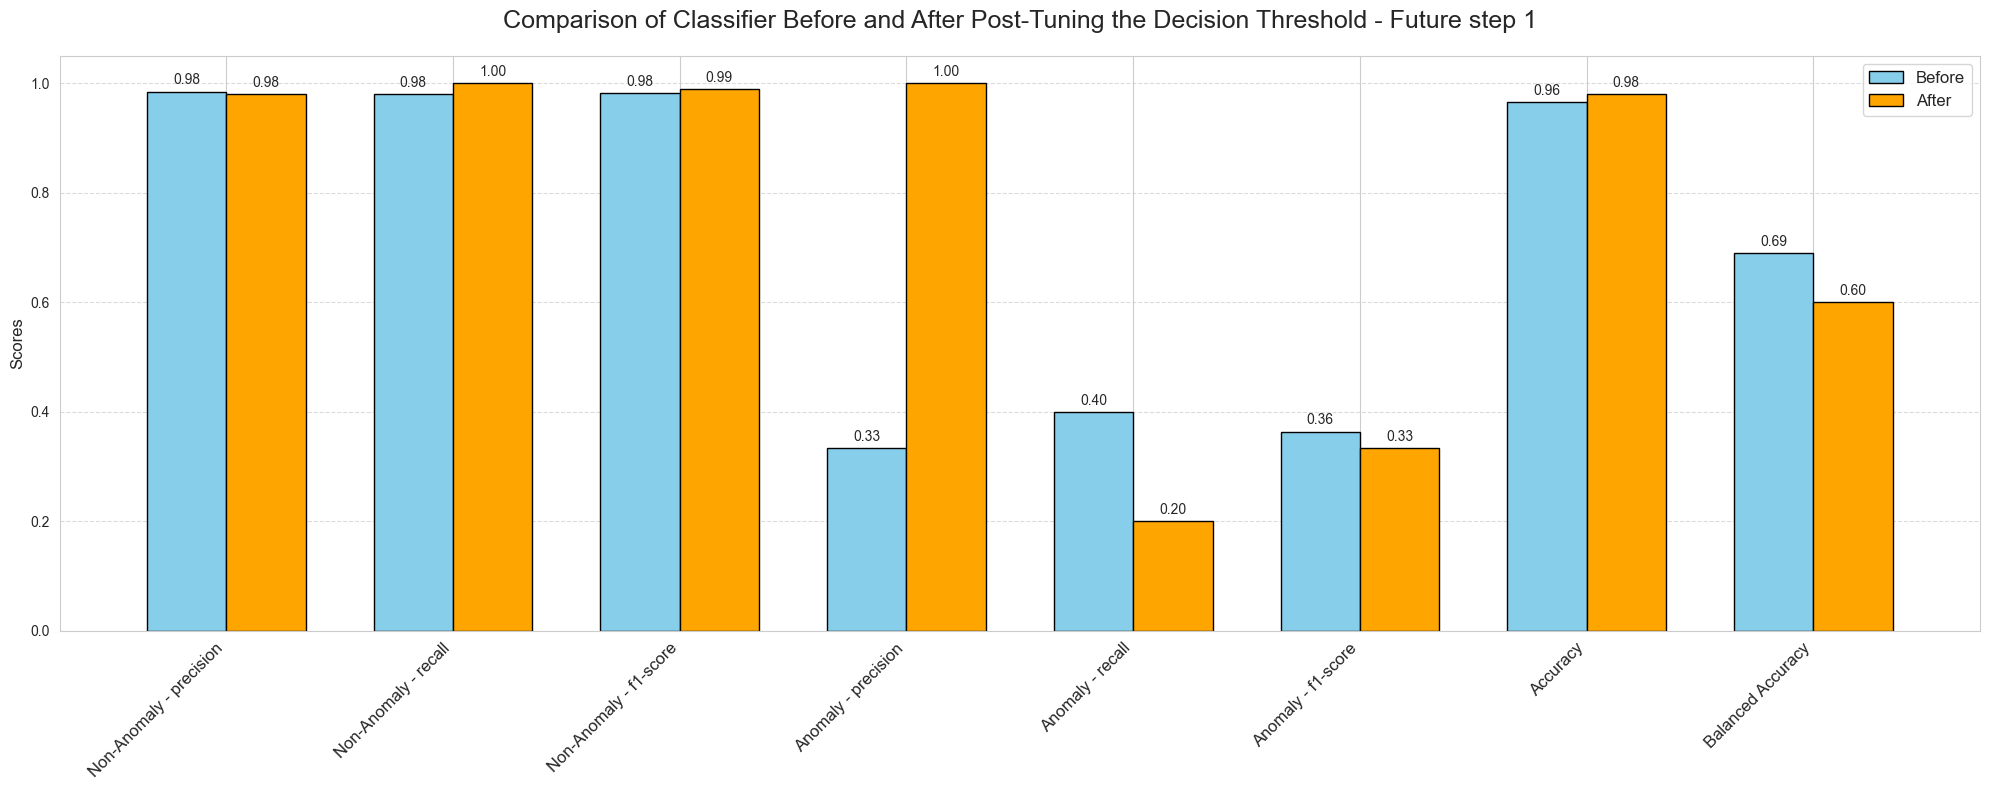

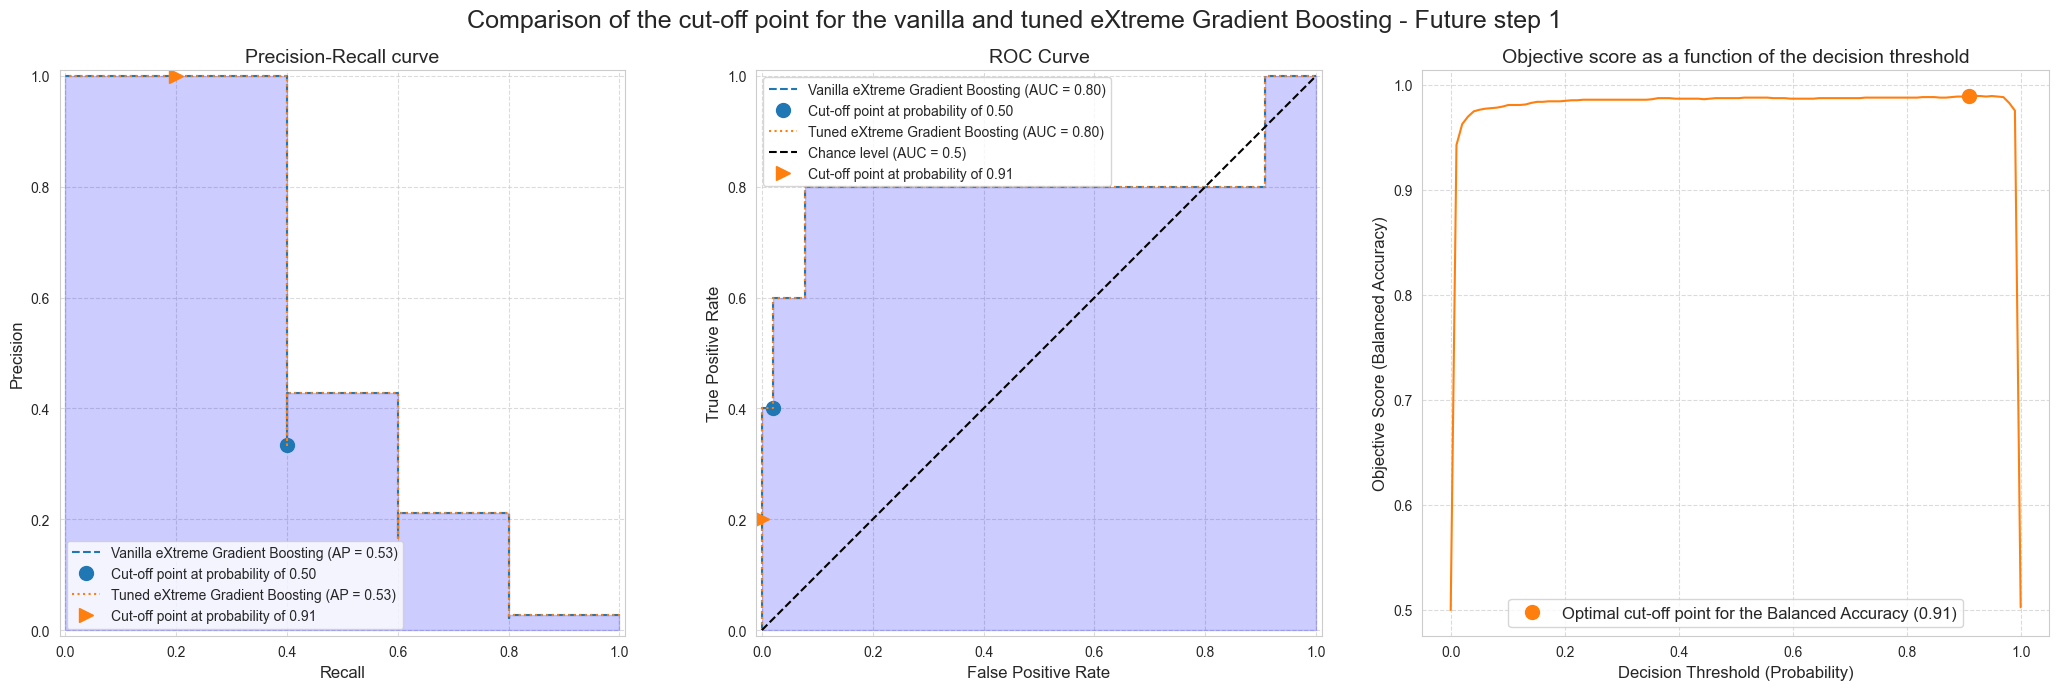

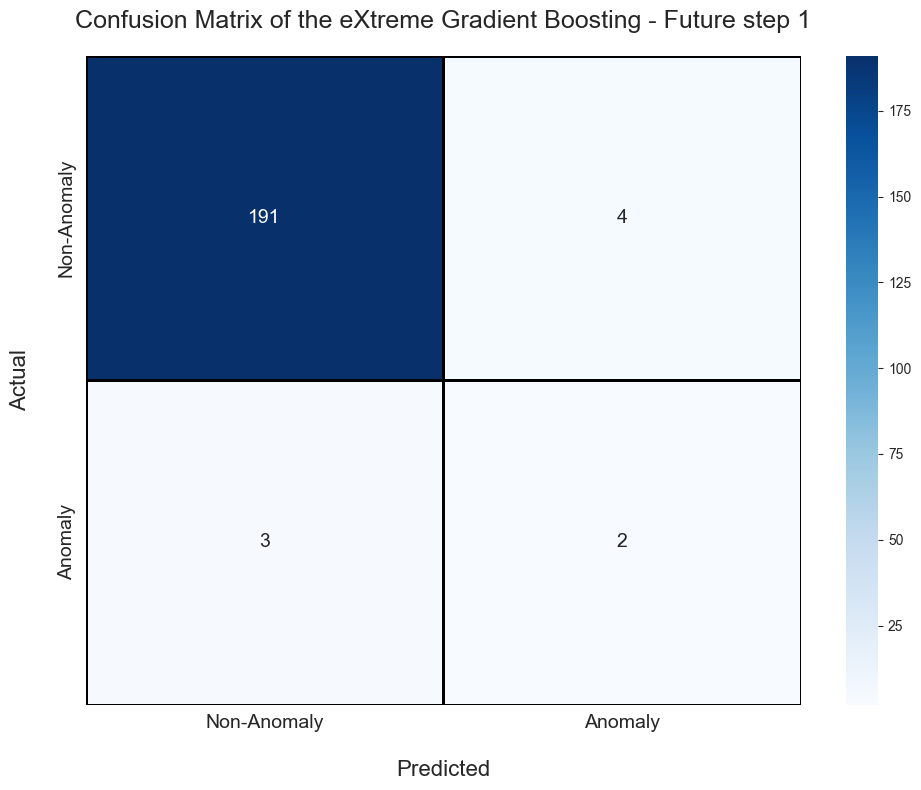

In [5]:
cnc.evaluate()